<a href="https://colab.research.google.com/github/kumarasakti/MachineLearningDicoding/blob/master/SKLearns_K_Mean_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/dataset/'
from sklearn.cluster import KMeans

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Change a csv to dataframe

In [4]:
df = pd.read_csv('gdrive/My Drive/dataset/mall.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


Preprocessing dataframe(Changing column name, make it uniform)

In [6]:
#mengubah nama kolom
df = df.rename(columns = {'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
#mengubah data kategorik menjadi data numerik 
df['gender'].replace(['Female','Male'], [0, 1], inplace=True)
#display data postprocessing
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Implementing elbow method with KMeans Lib

Text(0, 0.5, 'Inertia')

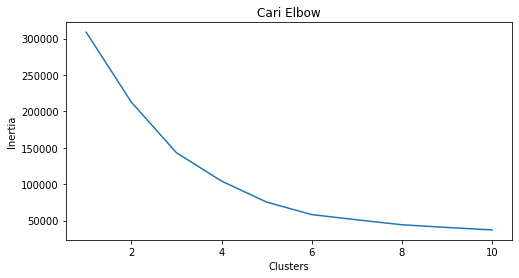

In [11]:
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
#membuat list yang berisi inertia
clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)
# Membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Make a KMeans Training models using K total from elbow method

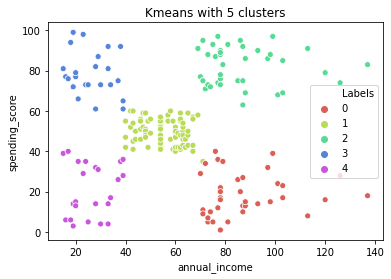

In [14]:
#membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

#menambah kolom label pada dataset 
X['Labels'] = km5.labels_

#Membuat plot KMeans dengan 5 kluster
sns.scatterplot(X['annual_income'],X['spending_score'], hue = X['Labels'],
                palette = sns.color_palette('hls', 5))
plt.title('Kmeans with 5 clusters')
plt.show()